<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/Affine_transform_matrix_and_warp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/image-processing-with-python/image-manipulation-and-transformation-with-python-006056705ee1

2nd topic

Affine transformation is just matrix multiplication

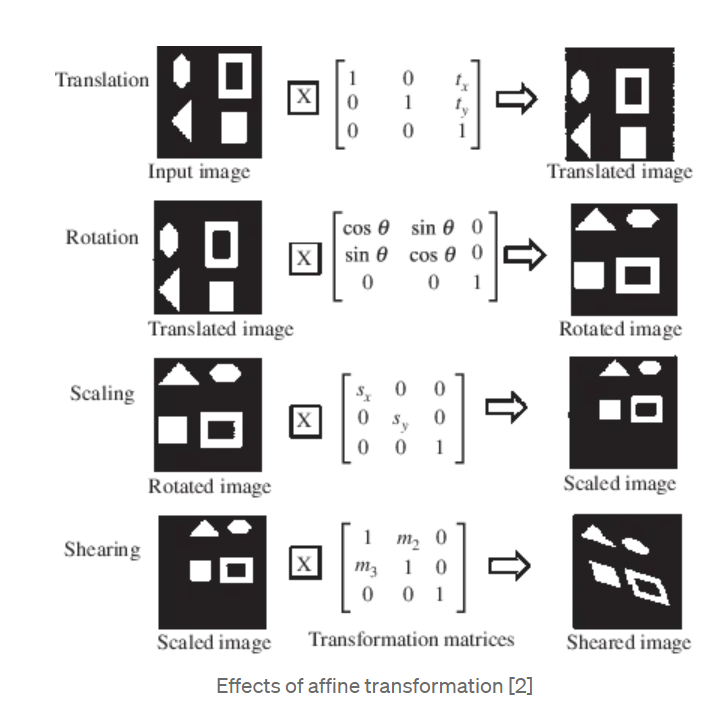

In [2]:
import numpy as np
from scipy import ndimage as ndi
from skimage import data
from matplotlib import pyplot as plt

img = data.camera()
w, h = img.shape

# Initialize a list to hold the transformed images
transformed_images = []
labels = []
# Original Image
transformed_images.append(img)
labels.append('1. Original')

In [3]:
mat_identity = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
img1 = ndi.affine_transform(img, mat_identity)
transformed_images.append(img1)
labels.append('1. Identity Transform')

mat_reflect = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]]) @ np.array([[1, 0, 0], [0, 1, -h], [0, 0, 1]])
img2 = ndi.affine_transform(img, mat_reflect) # offset=(0, h)
transformed_images.append(img2)
labels.append('2. Reflection Transform and offset')

s_x, s_y = 0.75, 1.25
mat_scale = np.array([[s_x, 0, 0], [0, s_y, 0], [0, 0, 1]])
img3 = ndi.affine_transform(img, mat_scale)
transformed_images.append(img3)
labels.append('3. Scale the Image')

theta = np.pi / 6 # 30 degrees in radians
mat_rotate = np.array([[1, 0, w/2], [0, 1, h/2], [0, 0, 1]]) @ np.array([[np.cos(theta), np.sin(theta), 0], [-np.sin(theta), np.cos(theta), 0], [0, 0, 1]]) @ np.array([[1, 0, -w/2], [0, 1, -h/2], [0, 0, 1]])
img4 = ndi.affine_transform(img1, mat_rotate)
transformed_images.append(img4)
labels.append('4. Rotate the Image ')

lambda1 = 0.5
mat_shear = np.array([[1, lambda1, 0], [lambda1, 1, 0], [0, 0, 1]])
img5 = ndi.affine_transform(img1, mat_shear)
transformed_images.append(img5)
labels.append('5. Shear the Image ')

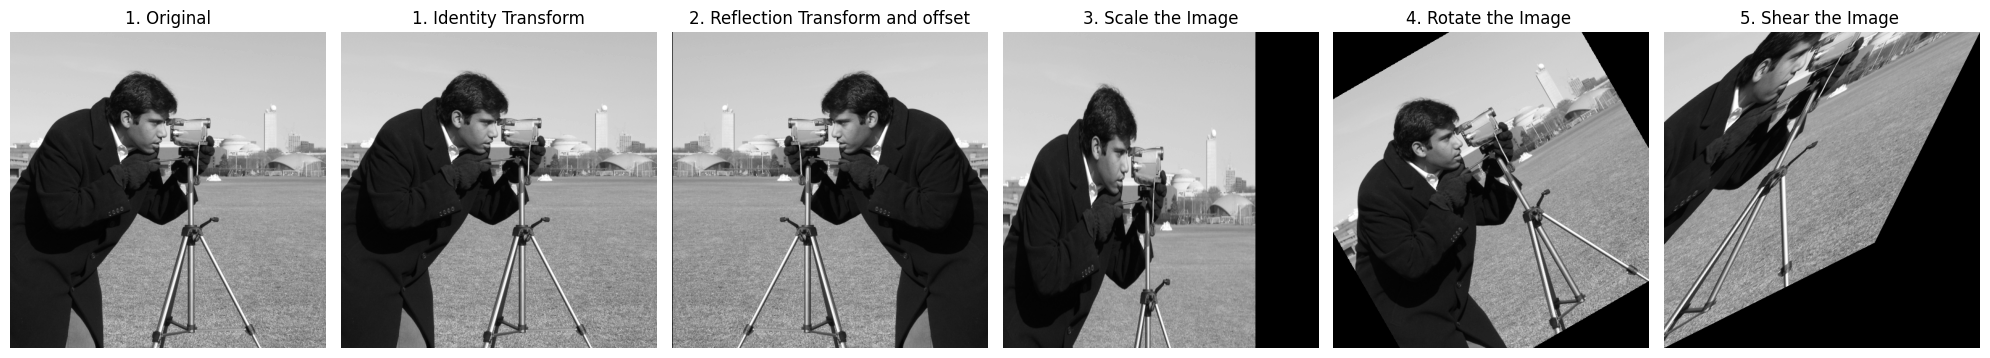

In [5]:
fig, axes = plt.subplots(1, len(transformed_images), figsize=(20, 10))
for ax, image, label in zip(axes, transformed_images, labels):
  ax.imshow(image, cmap='gray')
  ax.set_title(label)
  ax.axis('off')
plt.tight_layout()
plt.show()

=========================================

Perspective transformation

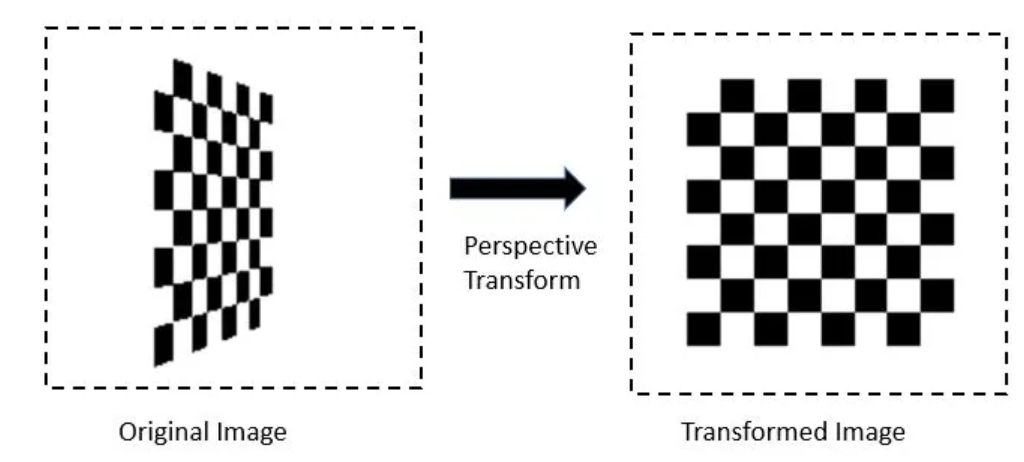

skimage warp function similar to register two camera images using optical flow

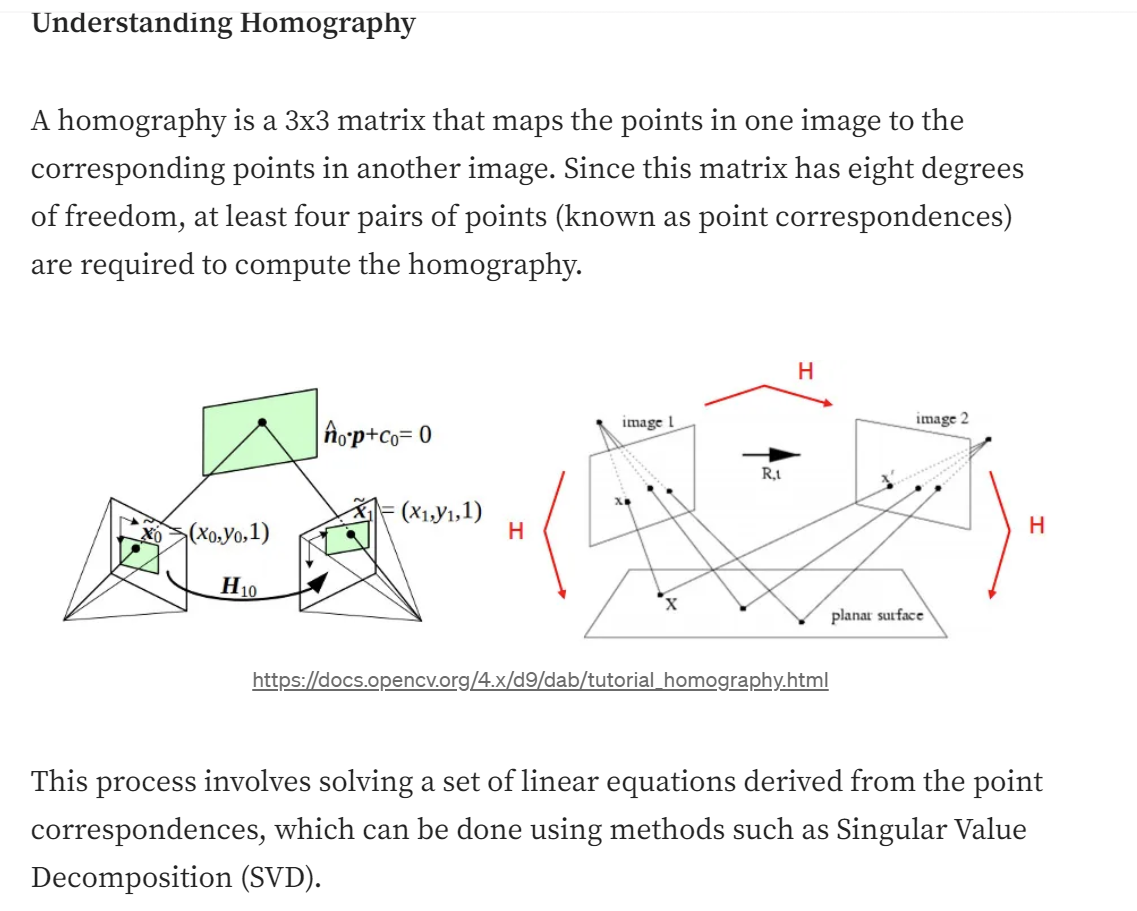

In [6]:
from skimage.transform import ProjectiveTransform, warp
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

In [10]:
im_src = data.chelsea()
height, width, dim = im_src.shape
im_dst = np.zeros((height, width, dim)) # color image

In [21]:
# Create an Instance of the ProjectiveTransform Class:

pt = ProjectiveTransform()

"""
Define Corresponding Points:
Specify four pairs of points in the source and destination images.
These points are used to estimate the homography matrix.
Four corners of src
"""

src = np.array([[0., 0.], [height-1, 0.], [height-1, width-1], [0., width-1]])
dst = np.array([[5., 74.], [260., 6.], [280., 427.], [10., 422.]])
pt.estimate(src, dst)

True

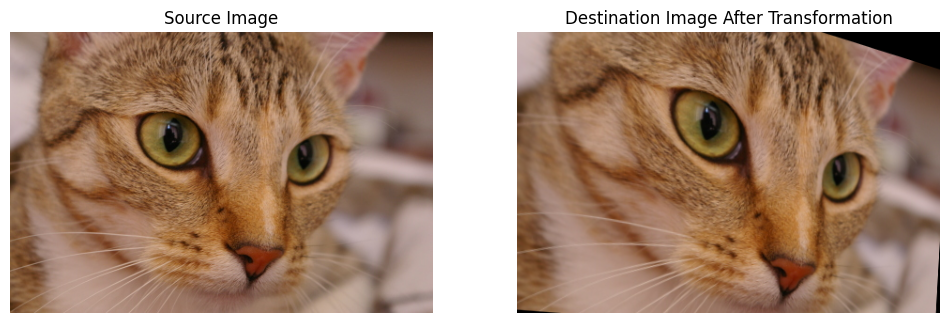

In [22]:
im_dst = warp(im_src, pt)

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(im_src), plt.title('Source Image'), plt.axis('off')
plt.subplot(122), plt.imshow(im_dst), plt.title('Destination Image After Transformation'), plt.axis('off')
plt.show()

In [18]:
im_dst.shape

(300, 451, 3)